In [120]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# How Roles Affect the Net Worth and Win Rate

In [121]:
full_data = pd.read_csv("Roles_Effect_Gold_and_Winrate.csv")

In [276]:
win_rate = full_data.radiant_win.copy()
full_role_rad = full_data.synergy_radiant.copy()
full_role_dire = full_data.synergy_dire.copy()

# Create Template for Appension

In [309]:
hero_roles_array = ['Carries', 'Supports', 'Nukers', 'Disablers', 'Junglers', 'Durable','Escape', 'Pushers', 'Initiators']

roles_array_rad = [[] for _ in range(len(hero_roles_array))]
roles_array_dire = [[] for _ in range(len(hero_roles_array))]

# Add Radiant and Dire Total Roles

In [310]:
for i in tqdm(range(len(full_role_rad))):
    temp_role = full_role_rad[i][2:-2].strip("][").split("', '")
    
    temp_array_rad = [0 for _ in range(len(hero_roles_array))]
    
    for j in temp_role:
        for k in range(len(hero_roles_array)):
            if j==hero_roles_array[k]:
                temp_array_rad[k] = temp_array_rad[k]+1
    
    for j in range(len(temp_array_rad)):
        roles_array_rad[j].append(temp_array_rad[j])

100%|█████████████████████████████████████████████████████████████████████████| 49887/49887 [00:01<00:00, 32956.20it/s]


In [312]:
for i in tqdm(range(len(full_role_dire))):
    temp_role = full_role_dire[i][2:-2].strip("][").split("', '")
    
    temp_array_dire = [0 for _ in range(len(hero_roles_array))]
    
    for j in temp_role:
        for k in range(len(hero_roles_array)):
            if j==hero_roles_array[k]:
                temp_array_dire[k] = temp_array_dire[k]+1
    
    for j in range(len(temp_array_dire)):
        roles_array_dire[j].append(temp_array_dire[j])

100%|█████████████████████████████████████████████████████████████████████████| 49887/49887 [00:01<00:00, 32855.27it/s]


# Create Net Worth DataFrame

In [281]:
gold_index = np.arange(1,11,1)
gold_each_player = full_data[full_data.columns[gold_index]].copy()

networth_rad = []
networth_dire = []

for i in tqdm(range(len(gold_each_player))):
    temp_rad = 0
    temp_dire = 0
    for j in range(len(gold_each_player.columns)):
        if j<5:
            temp_rad = temp_rad+int(gold_each_player[gold_each_player.columns[j]][i])
        else:
            temp_dire = temp_dire+int(gold_each_player[gold_each_player.columns[j]][i])
    networth_rad.append(temp_rad)
    networth_dire.append(temp_dire)

100%|█████████████████████████████████████████████████████████████████████████| 49887/49887 [00:02<00:00, 19036.52it/s]


# Add All Series to DataFrame

In [316]:
roles_df_winrate = pd.DataFrame()

roles_df_winrate["networth_rad"] = networth_rad
roles_df_winrate["networth_dire"] = networth_dire

roles_df_winrate["Radiant_Win"] = win_rate

for i in range(len(hero_roles_array)):
    roles_df_winrate[f"{hero_roles_array[i]}_rad"] = roles_array_rad[i]

for i in range(len(hero_roles_array)):
    roles_df_winrate[f"{hero_roles_array[i]}_dire"] = roles_array_dire[i]

In [148]:
def role_data_statistics(role_type,radiant_win=1):
    if radiant_win==1:
        role_type_var = role_type+"_rad"
        for i in range(6):
            print(f"The average win rate from {len(roles_df_winrate)} data for {role_type} and radiant is winning role of {i} amount is :",(len(roles_df_winrate[(roles_df_winrate.Radiant_Win==1)&(roles_df_winrate[f"{role_type_var}"]==i)])/len(roles_df_winrate[(roles_df_winrate.Radiant_Win==1)]))*100)
            print(f"The average win rate from {len(roles_df_winrate)} data for {i} {role_type}  amount is :",(len(roles_df_winrate[(roles_df_winrate.Radiant_Win==0)&(roles_df_winrate[f"{role_type_var}"]==i)])/len(roles_df_winrate[(roles_df_winrate[f"{role_type_var}"]==i)]))*100,"\n")
    elif radiant_win==0:
        role_type_var = role_type+"_dire"
        for i in range(6):
            print(f"The average win rate from {len(roles_df_winrate)} data for {role_type} and dire is winning role of {i} amount is :",(len(roles_df_winrate[(roles_df_winrate.Radiant_Win==0)&(roles_df_winrate[f"{role_type_var}"]==i)])/len(roles_df_winrate[(roles_df_winrate.Radiant_Win==0)]))*100)
            print(f"The average win rate from {len(roles_df_winrate)} data for {i} {role_type}  amount is :",(len(roles_df_winrate[(roles_df_winrate.Radiant_Win==0)&(roles_df_winrate[f"{role_type_var}"]==i)])/len(roles_df_winrate[(roles_df_winrate[f"{role_type_var}"]==i)]))*100,"\n")
    else:
        raise Exception("Error: Radiant is neither winning or losing")
    return

In [366]:
def role_data_networth(role_type_pick,rad_or_dire):
    if rad_or_dire=="rad":
        team = "Radiant"
        opposite_team = "Dire"
        role_type = role_type_pick+"_rad"
    else:
        team = "Dire"
        opposite_team = "Radiant"
        role_type = role_type_pick+"_dire"
        
    min_samples = ((2.57**2)*0.5*(1-0.5))/(0.05**2)
    x_values = []
    
    win_rate = []
    samples_amount = []
    samples_percentage = []
    z_score_rad = []
    z_score_dire = []
    
    mean_rad = []
    mean_dire = []
    median_rad = []
    median_dire = []
    for i in range(6):
        if len(roles_df_winrate[roles_df_winrate[role_type]==i])>=min_samples:
            x_values.append(i)
            win_rate.append(np.mean(roles_df_winrate[roles_df_winrate[role_type]==i].Radiant_Win)*100)
            samples_amount.append(len(roles_df_winrate[roles_df_winrate[role_type]==i]))
            samples_percentage.append((len(roles_df_winrate[roles_df_winrate[role_type]==i])/len(roles_df_winrate))*100)
            
            mean_rad.append(np.mean(roles_df_winrate[roles_df_winrate[role_type]==i].networth_rad))
            mean_dire.append(np.mean(roles_df_winrate[roles_df_winrate[role_type]==i].networth_dire))
            median_rad.append(np.median(roles_df_winrate[roles_df_winrate[role_type]==i].networth_rad))
            median_dire.append(np.median(roles_df_winrate[roles_df_winrate[role_type]==i].networth_dire))
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 9))
    axs[0].plot(x_values,win_rate,label="Win rate for Radiant")
    axs[0].plot(x_values,samples_percentage,label="Sample percentage")
    axs[0].set_title(f"Sample Percentage and Effects amount of {role_type_pick} in {team} to Win Rate")
    axs[0].set_xlabel(f"Amount of {role_type_pick} in {team}")
    axs[0].set_ylabel("Percentage (%)")
    axs[0].set_yticks(np.arange(0,100,10))
    axs[0].grid(linestyle="--")
    axs[0].set_ylim([0,100])
    axs[0].legend()
    
    axs[1].plot(x_values,mean_rad,label="Mean Radiant networth")
    axs[1].plot(x_values,mean_dire,label="Mean Dire networth")
    axs[1].plot(x_values,median_rad,label="Median Radiant networth")
    axs[1].plot(x_values,median_dire,label="Median Dire networth")
    axs[1].set_title(f"Effects amount of {role_type_pick} in {team} to Net Worth")
    axs[1].set_xlabel(f"Amount of {role_type_pick} in {team}")
    axs[1].set_ylabel("Networth (gold)")
    axs[1].grid(linestyle="--")
    axs[1].legend()
    
    plt.suptitle(f"Effects Amount of {role_type_pick} in {team}")
    
    plt.savefig(f"Figures/Effect amount of {role_type_pick} in {team} to Networth.png")
    
    print("="*123)
    print(f"This is based on {len(roles_df_winrate)} matches and ASSUMES THIS DATA IS POPULATION")
    print(f"The amount of samples required is {round(min_samples,3)} to have a confidence of 99.49%")
    print(f"With Z-Score : 2.57\nError : 5%\np : 0.5\n")
    for i in range(len(x_values)):
        print(f"For {x_values[i]} {role_type_pick} in both teams the samples used is : {samples_amount[i]}")
     
    print("="*66)
    print(f"{team}")
    print(f"\nHighest win rate is when {team} have {np.argmax(win_rate)} {role_type_pick}")
    print(f"Highest mean net worth for {team} is when having {np.argmax(mean_rad)} {role_type_pick}")
    print(f"Lowest mean net worth for {team} is when having {np.argmin(mean_rad)} {role_type_pick}")
    
    print("="*66)
    print(f"{opposite_team}")
    print(f"\nHighest win rate for {opposite_team} is when {team} have {np.argmin(win_rate)} {role_type_pick}")
    print(f"Highest mean net worth for {opposite_team} is when {team} have {np.argmax(mean_dire)} {role_type_pick}")
    print(f"Lowest mean net worth for {opposite_team} is when {team} have {np.argmin(mean_dire)} {role_type_pick}")
    
    print("="*123)
    
    plt.show()

    return

This is based on 49887 matches and ASSUMES THIS DATA IS POPULATION
The amount of samples required is 660.49 to have a confidence of 99.49%
With Z-Score : 2.57
Error : 5%
p : 0.5

For 1 Carries in both teams the samples used is : 1139
For 2 Carries in both teams the samples used is : 11931
For 3 Carries in both teams the samples used is : 23136
For 4 Carries in both teams the samples used is : 12052
For 5 Carries in both teams the samples used is : 1619
Dire

Highest win rate is when Dire have 0 Carries
Highest mean net worth for Dire is when having 0 Carries
Lowest mean net worth for Dire is when having 3 Carries
Radiant

Highest win rate for Radiant is when Dire have 2 Carries
Highest mean net worth for Radiant is when Dire have 1 Carries
Lowest mean net worth for Radiant is when Dire have 4 Carries


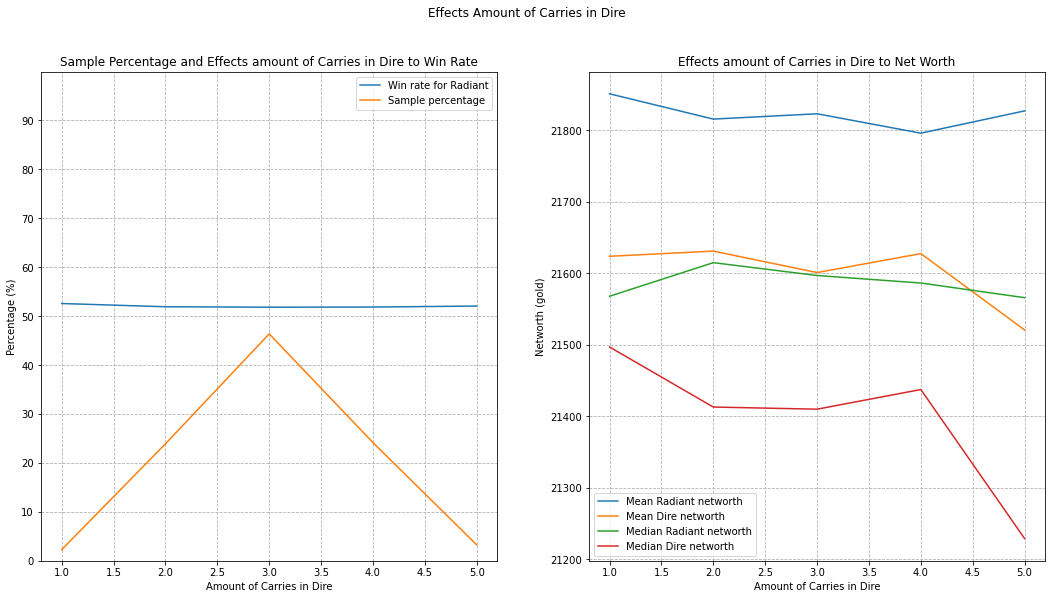

In [367]:
temp_df = role_data_networth("Carries","dire")

In [106]:
roles_df_winrate.describe()

,networth_rad,networth_dire,Radiant_Win,Carries_rad,Supports_rad,Nukers_rad,Disablers_rad,Junglers_rad,Durable_rad,Escape_rad,Initiators_rad,Carries_dire,Supports_dire,Nukers_dire,Disablers_dire,Junglers_dire,Durable_dire,Escape_dire,Pushers_dire,Initiators_dire
count,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000,49887.00000,49887.000000,49887.000000,49887.000000,49887.000000,49887.000000
mean,21815.538377,21612.756209,0.518873,3.014934,1.971896,3.840920,3.651973,0.419949,1.721350,1.968028,2.139415,3.021068,1.964921,3.831279,3.65945,0.426925,1.720087,1.991761,0.796219,2.131958
std,3048.776698,2982.820134,0.499649,0.838690,0.905849,0.872954,0.932703,0.603682,0.972371,1.012055,1.016949,0.838606,0.899320,0.876978,0.92701,0.606586,0.966206,1.016991,0.802119,1.008566
min,10868.000000,11305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19754.000000,19597.000000,0.000000,2.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.00000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,21597.000000,21414.000000,1.000000,3.000000,2.000000,4.000000,4.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.00000,0.000000,2.000000,2.000000,1.000000,2.000000
75%,23626.500000,23377.000000,1.000000,4.000000,3.000000,4.000000,4.000000,1.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.00000,1.000000,2.000000,3.000000,1.000000,3.000000
max,47931.000000,53307.000000,1.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,4.000000,5.000000,5.000000,5.000000,5.000000


## Hero ID

In [ ]:
hero_id.Roles[0]

# To Dos

## Finish Preprocess
### All append file and filtering is done BEFORE CALCULATION
### Find a better formula for synergy, right now max is 0.4 and min is -0.1, wtf
### Final formula should be 0 to 1
### What happens if 3 supp or 3 carry, or 3 initiator, etc
### Data scraping hero counters
### Statistical method to make sure my data is valid, how many samples does it take for it to be valid?